In [1]:
import torch
import numpy as np
import time
import torch.nn as nn
import os
import math
import torch.nn.functional as F 
import tiktoken
import numpy as np

In [2]:
class SciFiConfig:
    vocab_size: int = 100277  # cl100k-base
    n_embd: int = 768  # GPT-2

def load_tokens(filename):
    tokens = np.loadtxt(filename, dtype=np.int32)
    tokens = torch.tensor(tokens, dtype=torch.long)
    return tokens

class DataLoaderSciFi:
    def __init__(self, B, T, split=None):
        self.B = B
        self.T = T
        
        # get filename of dataset
        self.data_dir = 'data'
        self.tokens_filename = 'tokens.txt'
        self.tokens_path = os.path.join(self.data_dir, self.tokens_filename)
        
        self.reset()
    
    def reset(self):
        self.tokens = load_tokens(self.tokens_path)
        self.cur_pos = 0
    
    def next_batch(self):
        B, T = self.B, self.T
        buf = self.tokens[self.cur_pos : self.cur_pos + B * T + 1]
        x = buf[: B * T].view(B, T)
        y = buf[1: ].view(B, T)
        self.cur_pos = self.cur_pos + B * T 
        return x, y    

### Transformer Architecture:
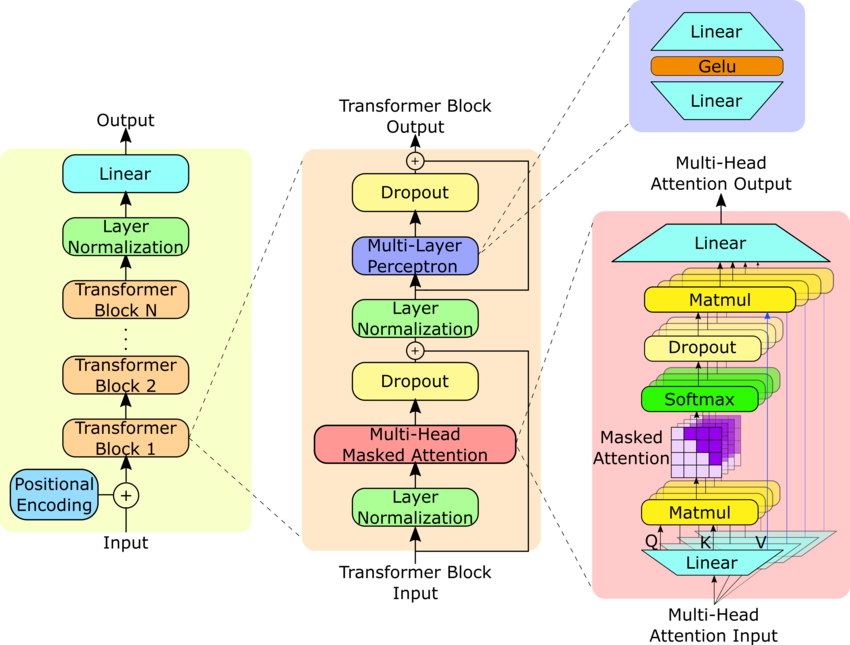

In [ ]:
# embedding: position embedding + word to token embedding
class Embedding(nn.Module):
    def __init__(self, config) -> None:
        super().__init__()
        self.config=config

# transformer block
class Block(nn.Module):
    
class Transformer(nn.Module):

class MLP(nn.Module):
    def __init__(self, config) -> None:
        super().__init__()
        self.config = config
    
        self.wte = nn.Embedding(config.vocab_size, config.n_embd)
        self.fc = nn.Linear(config.n_embd, 4 * config.n_embd)
        self.gelu = nn.GELU()
        self.proj = nn.Linear(4 * config.n_embd, config.vocab_size)
        
        self.apply(self._init_weights)
    
    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.xavier_uniform_(module.weight)
        elif isinstance(module, nn.Embedding):
            torch.nn.init.uniform_(module.weight, -1.0, 1.0)
    
    def forward(self, idx, targets=None):
        #B, T = idx.shape
        tok_emb = self.wte(idx) # (B, T, n_embd)
        logits = self.proj(self.gelu(self.fc(tok_emb)))
        
        loss = None
        if targets is not None:
            loss = F.cross_entropy(logits.view(-1, logits.shape[-1]), targets.view(-1), ignore_index=-1)
        return logits, loss
    
    def optimizer(self, learning_rate):
        optimizer = torch.optim.AdamW(self.parameters(), lr=learning_rate, betas=(0.9, 0.95), eps=1e-8)
        return optimizer
